# Homework 1 Solution
# Part A: Climate Change

In [7]:
# Import required packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [8]:
# Read climate_change.csv dataset and print first five rows
df = pd.read_csv('climate_change.csv')
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [9]:
# Split dataframe into training and test sets
df_train = df[df['Year'] <= 2002]
df_test = df[df['Year'] > 2002]

### Part (a)

In [10]:
# Create list of names of features that will be used in the model
features = ['MEI',
 'CO2',
 'CH4',
 'N2O',
 'CFC-11',
 'CFC-12',
 'TSI',
 'Aerosols']

# Extract features and dependent variable from training and test dataframes
X_train = df_train[features]
y_train = df_train['Temp']
X_test = df_test[features]
y_test = df_test['Temp']

# Create a blank linear regression model and train it using the training data
LR_a = LinearRegression()
LR_a.fit(X_train,y_train)

# Print in-sample and out-of-sample metrics
print(r2_score(y_train,LR_a.predict(X_train)))
print(r2_score(y_test,LR_a.predict(X_test)))
print(mean_squared_error(y_train,LR_a.predict(X_train)))
print(mean_squared_error(y_test,LR_a.predict(X_test)))
print(mean_absolute_error(y_train,LR_a.predict(X_train)))
print(mean_absolute_error(y_test,LR_a.predict(X_test)))

0.6920595959984914
-0.5413255834026589
0.008731426409910687
0.012206974835140045
0.07260918612938654
0.09312747891277418


### Part (b)

In [11]:
# Create list of names of features that will be used in the model
features = ['MEI',
 'N2O',
 'TSI',
 'Aerosols']

# Extract features and dependent variable from training and test dataframes
X_train = df_train[features]
y_train = df_train['Temp']
X_test = df_test[features]
y_test = df_test['Temp']

# Create a blank linear regression model and train it using the training data
LR_b = LinearRegression()
LR_b.fit(X_train,y_train)

# Print in-sample and out-of-sample metrics
print(r2_score(y_train,LR_b.predict(X_train)))
print(r2_score(y_test,LR_b.predict(X_test)))
print(mean_squared_error(y_train,LR_b.predict(X_train)))
print(mean_squared_error(y_test,LR_b.predict(X_test)))
print(mean_absolute_error(y_train,LR_b.predict(X_train)))
print(mean_absolute_error(y_test,LR_b.predict(X_test)))

0.6490120806760352
0.2003186110455485
0.009952007429105842
0.006333308611894146
0.07666650280233132
0.061540272693933834


### Part (d)

In [6]:
# Check coefficient for N2O in both models
print(LR_a.coef_[3])
print(LR_b.coef_[1])

-0.0348478074557768
0.02427612090200422


# Part B: Baseball Analytics

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('baseball.csv')
df.head()

,Salary,AtBats,Hits,HmRuns,Runs,RBIs,Walks,Years,CareerAtBats,CareerHits,CareerHmRuns,CareerRuns,CareerRBIs,CareerWalks,PutOuts,Assists,Errors,League,Division,NewLeague
0,7125,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,N,W,N
1,7200,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,A,W,A
2,7500,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,N,C,N
3,1373,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,N,E,N
4,11250,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,A,C,A


## Question B.1

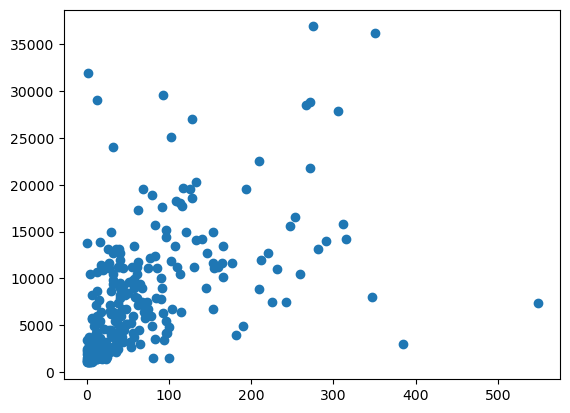

In [3]:
plt.scatter(df['CareerHmRuns'],df['Salary'])

In [4]:
# Apply one-hot encoding to categorical variables
df = pd.get_dummies(df, columns=['League','Division','NewLeague'],drop_first=True)
df.head()

,Salary,AtBats,Hits,HmRuns,Runs,RBIs,Walks,Years,CareerAtBats,CareerHits,...,CareerRuns,CareerRBIs,CareerWalks,PutOuts,Assists,Errors,League_N,Division_E,Division_W,NewLeague_N
0,7125,315,81,7,24,38,39,14,3449,835,...,321,414,375,632,43,10,True,False,True,True
1,7200,479,130,18,66,72,76,3,1624,457,...,224,266,263,880,82,14,False,False,True,False
2,7500,496,141,20,65,78,37,11,5628,1575,...,828,838,354,200,11,3,True,False,False,True
3,1373,321,87,10,39,42,30,2,396,101,...,48,46,33,805,40,4,True,True,False,True
4,11250,594,169,4,74,51,35,11,4408,1133,...,501,336,194,282,421,25,False,False,False,False


In [5]:
# 70/30 split into train and test sets
features = [
 'AtBats',
 'Hits',
 'HmRuns',
 'Runs',
 'RBIs',
 'Walks',
 'Years',
 'CareerAtBats',
 'CareerHits',
 'CareerHmRuns',
 'CareerRuns',
 'CareerRBIs',
 'CareerWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'League_N',
 'Division_E',
 'Division_W',
 'NewLeague_N']
X = df[features]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=2023)

## Question B.2

In [6]:
# Ordinary Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
print(r2_score(y_train,reg.predict(X_train)))
print(r2_score(y_test,reg.predict(X_test)))
coef = dict(list(zip(reg.feature_names_in_, reg.coef_)))
print(coef['CareerHmRuns'])
print(coef['Division_W']-coef['Division_E'])
print(-coef['Division_W'])
print(coef['Division_E'])

0.6790177427057971
0.23099143164489033
28.832971720029143
-2143.2875381849713
582.4415945455424
1560.845943639429


## Question B.3

In [7]:
# Ridge
alphas = np.logspace(-10, 10, 1000)
reg = RidgeCV(alphas=alphas,cv=10)
reg.fit(X_train,y_train)
print(r2_score(y_train,reg.predict(X_train)))
print(r2_score(y_test,reg.predict(X_test)))
print(reg.alpha_)
coef = dict(list(zip(reg.feature_names_in_, reg.coef_)))
print(coef['CareerHmRuns'])

0.5868455283072949
0.2072246415238036
1191450.6981197796
2.5771696960436814


## Question B.4

In [8]:
# Lasso
alphas = np.logspace(-10, 10, 1000)
reg = LassoCV(alphas=alphas,cv=10,max_iter=1000)
reg.fit(X_train,y_train)
print(r2_score(y_train,reg.predict(X_train)))
print(r2_score(y_test,reg.predict(X_test)))
print(reg.alpha_)
sum(reg.coef_ != 0)

/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949121.0326299667, tolerance: 627669.5884581817
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980447.7391257286, tolerance: 627669.5884581817
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965041.9876422882, tolerance: 627669.5884581817
  model = cd_fast.enet_coordinate_descen

0.6531411730720982
0.1948664126239441
2154.4346900318865


/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303290841.5916165, tolerance: 704468.4561403615
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284732534.1918081, tolerance: 704468.4561403615
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399104304.0223713, tolerance: 704468.4561403615
  model = cd_fast.enet_coordinate_descen

12